In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## IDEJE

* Napravit plot u ovisnosti o napadu/obrani, pokazat koji je najbolji napadač, najbolji obrambeni (2D) plot

* Statistike za MVP-ove u zadnjih 10 godina

In [2]:
players = pd.read_csv("Data/nba_players_stats/Players.csv")

In [3]:
players[-10:]

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
3912,3912,Denzel Valentine,198.0,96.0,Michigan State University,1993.0,Lansing,Michigan
3913,3913,Fred VanVleet,183.0,88.0,Wichita State University,1994.0,Rockford,Illinois
3914,3914,Taurean Waller-Prince,183.0,88.0,NaN,1994.0,NaN,NaN
3915,3915,Okaro White,203.0,92.0,Florida State University,1992.0,Clearwater,Florida
3916,3916,Isaiah Whitehead,193.0,96.0,Seton Hall University,1995.0,Brooklyn,New York
3917,3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany
3921,3921,Ivica Zubac,216.0,120.0,NaN,1997.0,Mostar,Bosnia and Herzegovina


In [4]:
season_stats = pd.read_csv("Data/nba_players_stats/Seasons_Stats.csv")

In [5]:
season_stats[-1:]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [13]:
season_stats.columns

Index([u'Unnamed: 0', u'Year', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS',
       u'MP', u'PER', u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%',
       u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'blanl', u'OWS', u'DWS',
       u'WS', u'WS/48', u'blank2', u'OBPM', u'DBPM', u'BPM', u'VORP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PTS'],
      dtype='object')

In [48]:
season_stats.loc[20000, ['FG','FGA','3P', '3PA']]

FG      68
FGA    147
3P       2
3PA      7
Name: 20000, dtype: object

In [135]:
three_point_fg = season_stats.loc[:, ['Year', '3P', '3PA', '2PA']]

Year
3P
3PA
2PA


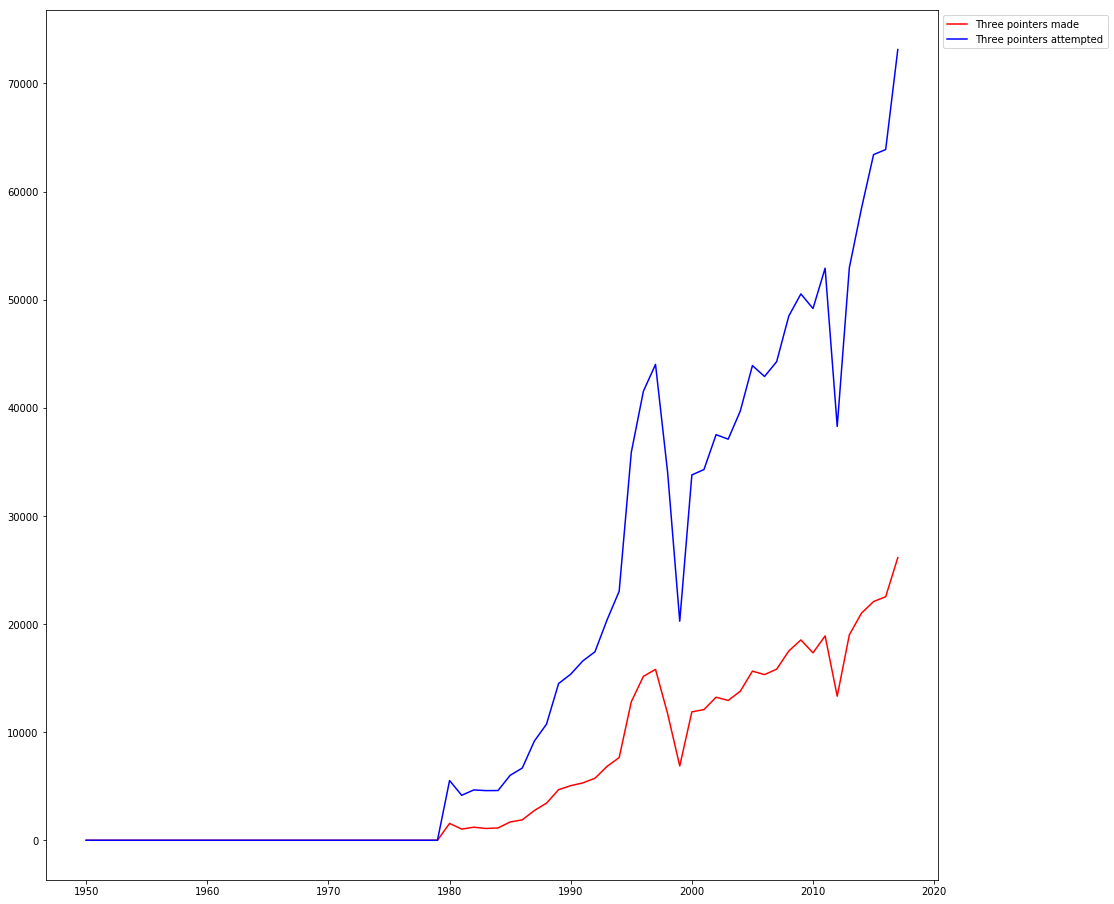

In [136]:
for year in three_point_fg:
    print year
map_three_year = {}
for i in range(len(three_point_fg)):
    year, threes_made, field_goals = three_point_fg['Year'][i], three_point_fg['3P'][i], three_point_fg['3PA'][i]
    ft_made = three_point_fg['2PA'][i]
    if np.isnan(year):
        continue
    if np.isnan(threes_made):
        threes_made = 0
    if np.isnan(field_goals):
        field_goals = 0
    if np.isnan(ft_made):
        ft_made = 0
    year = int(year)
    if year not in map_three_year:
        map_three_year[year] = (threes_made, field_goals)
    else:
        map_three_year[year] = (map_three_year[year][0] + threes_made, map_three_year[year][1] + field_goals)

sorted_years = sorted(map_three_year.items(), key= lambda x : x[0])
years, threes_made, field_goals_made, ft_made = [], [], [], []
for year, curr_shots in sorted_years:
    #print str(year) + " : " + str(curr_shots)
    years.append(year)
    threes_made.append(curr_shots[0])
    field_goals_made.append(curr_shots[1])
    #ft_made.append(curr_shots[2])

plt.figure(figsize=(16, 16))
plt.plot(years, threes_made, color = "red", label="Three pointers made")
plt.plot(years, field_goals_made, color="blue", label="Three pointers attempted")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

## Advanced stats for MVPs in last 10 years

In [101]:
mvp_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Kevin Durant')]
mvp_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Derrick Rose')]
mvp_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kobe Bryant')]
mvp_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Dirk Nowitzki')]

mvps = [mvp_2007, mvp_2008, mvp_2009, mvp_2010, mvp_2011, mvp_2012, mvp_2013, mvp_2014, mvp_2015, mvp_2016]

In [126]:
mvp_2007.iloc[0]['Year']

2007.0

## Defensive vs offensive stats for top 30 players in PER

In [220]:
curr_season = season_stats.loc[season_stats['Year'] == 2017.0]

In [221]:
# Removes duplicate players, only leaves TOT team (if player was traded through season)
player_occurrences = {}
for i in range(len(curr_season)):
    player_name = curr_season.iloc[i]['Player']
    player_team = curr_season.iloc[i]['Tm']
    index_row = curr_season.index[i]
    if player_name not in player_occurrences:
        player_occurrences[player_name] = []
    player_occurrences[player_name].append((player_team, index_row))

for key in player_occurrences:
    curr_list = player_occurrences[key]
    if len(curr_list) == 1:
        continue
    for team, index in curr_list:
        if team != "TOT":
            curr_season = curr_season.drop(index)

In [222]:
curr_season = curr_season.loc[curr_season['MP'] >= 1000.0]

In [223]:
per_sorted = curr_season.sort_values(by='PER', ascending=False)

In [224]:
top_per = per_sorted[:30]
top_per

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24654,24654,2017.0,Russell Westbrook,PG,28.0,OKC,81.0,81.0,2802.0,30.6,...,0.845,137.0,727.0,864.0,840.0,133.0,31.0,438.0,190.0,2558.0
24239,24239,2017.0,Kevin Durant,SF,28.0,GSW,62.0,62.0,2070.0,27.6,...,0.875,39.0,474.0,513.0,300.0,66.0,99.0,138.0,117.0,1555.0
24218,24218,2017.0,Anthony Davis,C,23.0,NOP,75.0,75.0,2708.0,27.5,...,0.802,174.0,712.0,886.0,157.0,94.0,167.0,181.0,168.0,2099.0
24414,24414,2017.0,Kawhi Leonard,SF,25.0,SAS,74.0,74.0,2474.0,27.5,...,0.880,80.0,350.0,430.0,260.0,132.0,55.0,154.0,122.0,1888.0
24306,24306,2017.0,James Harden,PG,27.0,HOU,81.0,81.0,2947.0,27.3,...,0.847,95.0,564.0,659.0,906.0,120.0,37.0,464.0,215.0,2356.0
24365,24365,2017.0,LeBron James,SF,32.0,CLE,74.0,74.0,2794.0,27.0,...,0.674,97.0,543.0,640.0,646.0,92.0,44.0,303.0,134.0,1954.0
24612,24612,2017.0,Isaiah Thomas,PG,27.0,BOS,76.0,76.0,2569.0,26.5,...,0.909,43.0,162.0,205.0,449.0,70.0,13.0,210.0,167.0,2199.0
24380,24380,2017.0,Nikola Jokic,C,21.0,DEN,73.0,59.0,2038.0,26.4,...,0.825,212.0,506.0,718.0,359.0,61.0,56.0,171.0,214.0,1221.0
24522,24522,2017.0,Chris Paul,PG,31.0,LAC,61.0,61.0,1921.0,26.2,...,0.892,41.0,263.0,304.0,563.0,118.0,8.0,147.0,146.0,1104.0
24115,24115,2017.0,Giannis Antetokounmpo,SF,22.0,MIL,80.0,80.0,2845.0,26.1,...,0.770,142.0,558.0,700.0,434.0,131.0,151.0,234.0,246.0,1832.0


In [226]:
filtered_top_per = top_per.loc[:, ['Player', 'OBPM', 'DBPM', 'PER']]
filtered_top_per

,Player,OBPM,DBPM,PER
24654,Russell Westbrook,10.9,4.7,30.6
24239,Kevin Durant,5.4,2.6,27.6
24218,Anthony Davis,1.4,2.3,27.5
24414,Kawhi Leonard,6.4,1.5,27.5
24306,James Harden,8.7,1.5,27.3
24365,LeBron James,6.8,1.6,27.0
24612,Isaiah Thomas,8.8,-3.3,26.5
24380,Nikola Jokic,6.2,2.2,26.4
24522,Chris Paul,7.8,1.0,26.2
24115,Giannis Antetokounmpo,4.1,3.5,26.1


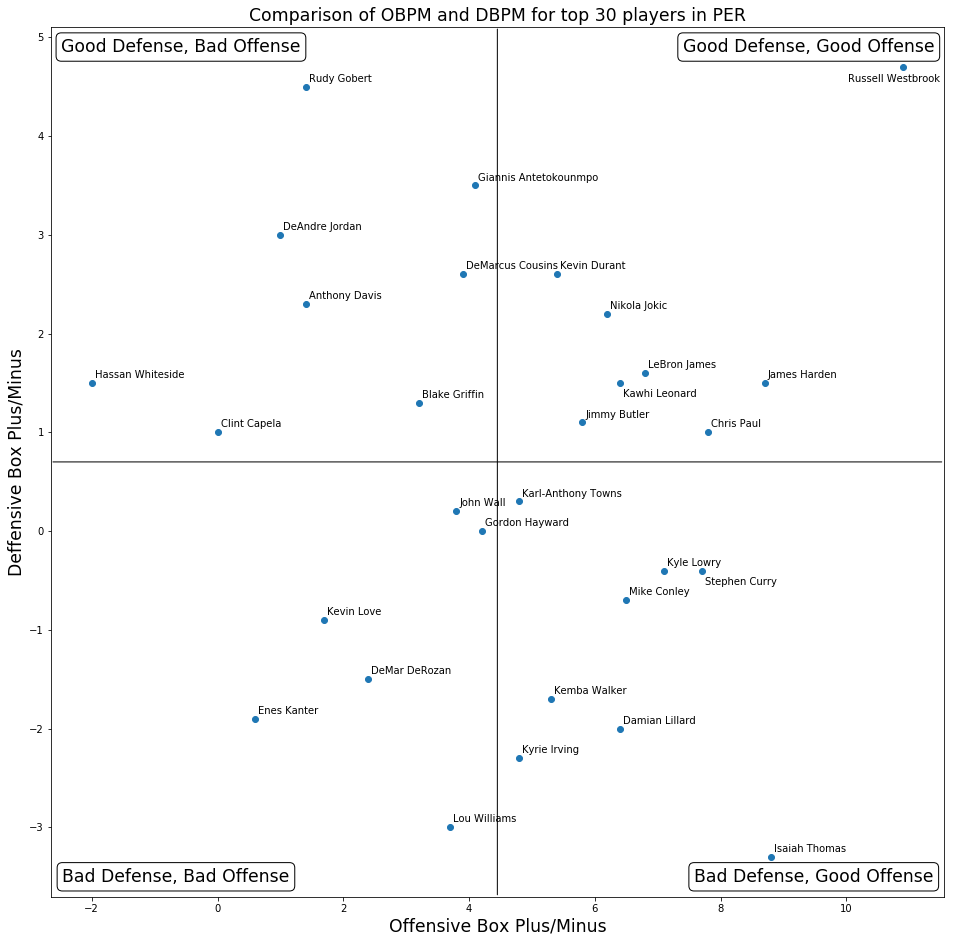

In [306]:
plt.figure(figsize=(16, 16))
plt.scatter(filtered_top_per.iloc[:]['OBPM'], filtered_top_per.iloc[:]['DBPM'])
for i in range(len(filtered_top_per)):
    xy_text = (3, 5)
    name = filtered_top_per.iloc[i]['Player']
    if name == "Stephen Curry" or name == "Kawhi Leonard":
        xy_text = (3, -14)
    if name == 'Russell Westbrook':
        xy_text = (-55, -15)
    plt.annotate(s= name
                , xy=(filtered_top_per.iloc[i]['OBPM'], filtered_top_per.iloc[i]['DBPM'])
                ,xycoords = "data", textcoords='offset points', xytext=xy_text)
    
plt.xlim()
plt.annotate(s="", xy=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[0]), 
             xytext=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[1]), 
             arrowprops=dict(arrowstyle="-",
                    connectionstyle="arc3"))

plt.annotate(s="", xy=(plt.xlim()[0], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             xytext=(plt.xlim()[1], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="Good Defense, Bad Offense", xy=(plt.xlim()[0],plt.ylim()[1]),
             textcoords="offset points", xytext=(130, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Good Defense, Good Offense", xy=(plt.xlim()[1],plt.ylim()[1]),
             textcoords="offset points", xytext=(-135, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Bad Defense, Bad Offense", xy=(plt.xlim()[0],plt.ylim()[0]),
             textcoords="offset points", xytext=(125, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Bad Defense, Good Offense", xy=(plt.xlim()[1],plt.ylim()[0]),
             textcoords="offset points", xytext=(-130, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.xlabel("Offensive Box Plus/Minus", size="xx-large")
plt.ylabel("Deffensive Box Plus/Minus", size="xx-large")
plt.title("Comparison of OBPM and DBPM for top 30 players in PER", size="xx-large")
plt.show()

## Defensive vs Offensive win shares for top 30 players in WS